In [1]:
import zipfile
import os
import tempfile

def unzip_file(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_csv_from_zip(zip_file_path):
    # Unzip the file
    unzip_file(zip_file_path)

    # Find the CSV file in the extracted files
    csv_file = None
    for file in os.listdir('.'):
        if file.endswith(".csv"):
            csv_file = os.path.abspath(file)
            break

    if csv_file:
        return csv_file
    else:
        raise FileNotFoundError("No CSV file found in the zip archive")


In [4]:
# Example usage:
zip_file_path = "/content/drive/MyDrive/archive.zip"
csv_file_path = get_csv_from_zip(zip_file_path)
print("CSV file extracted to:", csv_file_path)

CSV file extracted to: /content/harddrive.csv


In [5]:
import pandas as pd

dataset = pd.read_csv(csv_file_path)

In [6]:
dataset.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# print(dataset.describe())
dataset = dataset[:1000000]

In [8]:
len(dataset)

1000000

In [9]:
raw_columns = [col for col in dataset.columns if col.endswith('_raw')]
print(raw_columns)
dataset_cleaned = dataset.drop(columns=raw_columns)
print(dataset_cleaned.head())

['smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 'smart_8_raw', 'smart_9_raw', 'smart_10_raw', 'smart_11_raw', 'smart_12_raw', 'smart_13_raw', 'smart_15_raw', 'smart_22_raw', 'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_195_raw', 'smart_196_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_200_raw', 'smart_201_raw', 'smart_220_raw', 'smart_222_raw', 'smart_223_raw', 'smart_224_raw', 'smart_225_raw', 'smart_226_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw', 'smart_250_raw', 'smart_251_raw', 'smart_252_raw', 'smart_254_raw', 'smart_255_raw']
         date    serial_number                    model  capacity_bytes  \
0  2016-01-01   MJ0351YNG9Z0XA  Hitachi HDS5C3030ALA630   1.482490e-311   
1  2016-01-01         Z305B2QN              ST4000DM000   1.976651e-311   
2  2016-01-01   MJ0351YNG9Z7LA 

In [10]:
dataset_cleaned.fillna(0)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,...,smart_225_normalized,smart_226_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,135.0,143,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,0.0,96,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,136.0,124,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,136.0,137,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0.0,175,100,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2016-01-17,Z300T70P,ST4000DM000,1.976651e-311,0,117,0.0,93,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
999996,2016-01-17,S300HSK6,ST4000DM000,1.976651e-311,0,114,0.0,94,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
999997,2016-01-17,Z3029G5T,ST4000DM000,1.976651e-311,0,117,0.0,92,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
999998,2016-01-17,Z3029G5V,ST4000DM000,1.976651e-311,0,117,0.0,95,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0


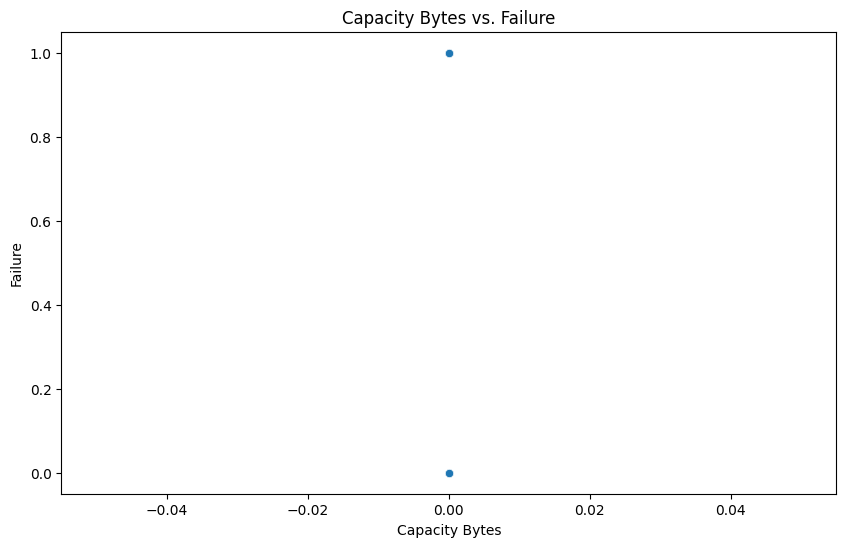

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_cleaned, x='capacity_bytes', y='failure')
plt.title('Capacity Bytes vs. Failure')
plt.xlabel('Capacity Bytes')
plt.ylabel('Failure')
plt.show()

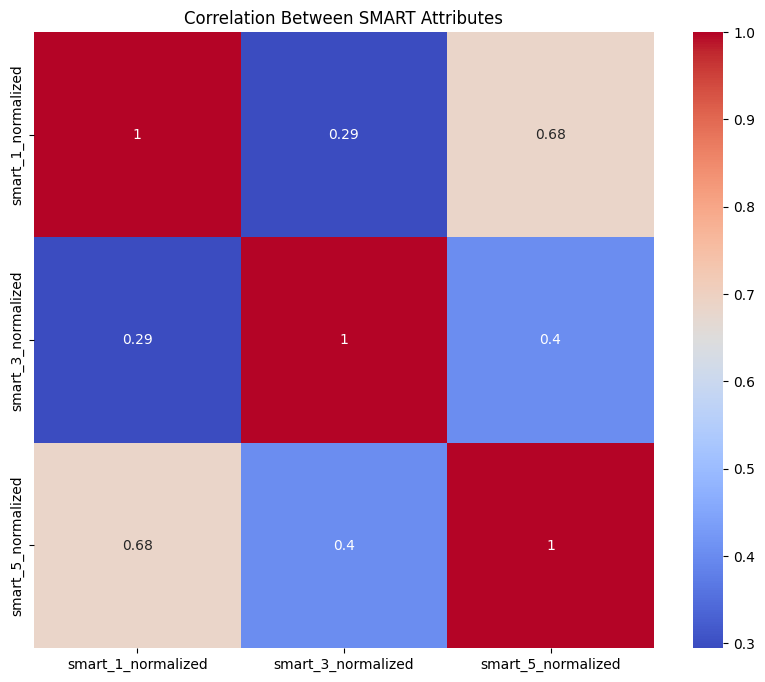

In [12]:
# SMART attributes for simplicity
columns_of_interest = ['smart_1_normalized', 'smart_3_normalized', 'smart_5_normalized']
correlation_matrix = dataset_cleaned[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between SMART Attributes')
plt.show()

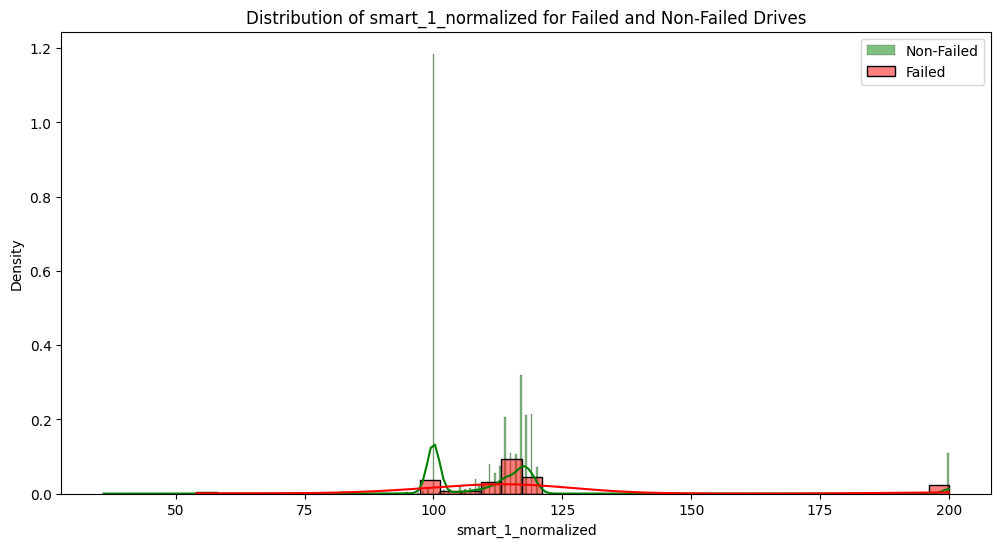

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

smart_attribute = 'smart_1_normalized'

failed_drives = dataset_cleaned[dataset_cleaned['failure'] == 1]
non_failed_drives = dataset_cleaned[dataset_cleaned['failure'] == 0]

plt.figure(figsize=(12, 6))

sns.histplot(non_failed_drives[smart_attribute], color='green', kde=True, stat='density', label='Non-Failed')

sns.histplot(failed_drives[smart_attribute], color='red', kde=True, stat='density', label='Failed')

plt.title(f'Distribution of {smart_attribute} for Failed and Non-Failed Drives')
plt.xlabel(smart_attribute)
plt.ylabel('Density')
plt.legend()
plt.show()


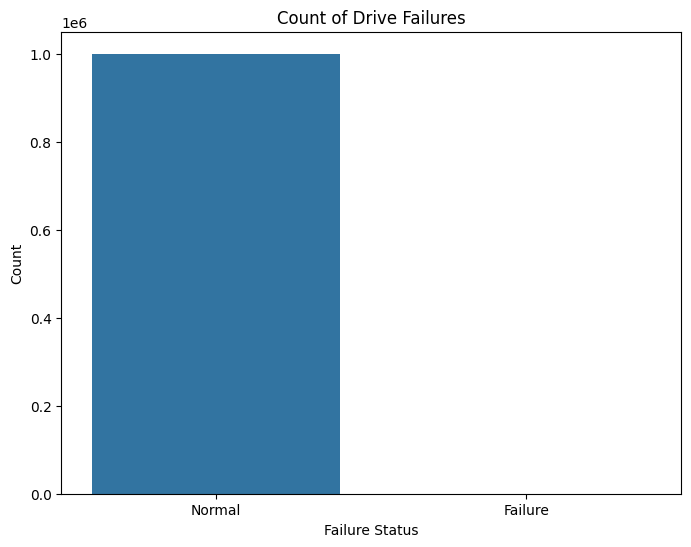

In [14]:
#  the imbalance in the 'failure' column as the are ~3million rows but only ~270 failures
failure_counts = dataset_cleaned['failure'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title('Count of Drive Failures')
plt.xlabel('Failure Status')
plt.ylabel('Count')
plt.xticks(range(len(failure_counts)), ['Normal', 'Failure'])
plt.show()

In [15]:
dataset_cleaned['failure'].value_counts()

failure
0    999937
1        63
Name: count, dtype: int64

In [16]:
dataset_cleaned = dataset_cleaned.fillna(0)

In [17]:
from sklearn.model_selection import train_test_split

# Assuming you're predicting 'failure', separate features and target
X = dataset_cleaned.drop(['failure', 'date', 'serial_number', 'model'], axis=1)
y = dataset_cleaned['failure']

In [18]:
X.head()

,capacity_bytes,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_8_normalized,smart_9_normalized,smart_10_normalized,...,smart_225_normalized,smart_226_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized
0,1.482490e-311,100,135.0,143,100,100,100,122.0,97,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.976651e-311,113,0.0,96,100,100,63,0.0,100,100,...,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
2,1.482490e-311,100,136.0,124,100,100,100,122.0,97,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.482490e-311,100,136.0,137,100,100,100,122.0,97,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.482490e-311,200,0.0,175,100,200,100,0.0,84,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [20]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to PyTorch tensors
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_val_torch = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).to(device)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [21]:
import torch
import torch.nn as nn
import torch.optim
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

class SimpleAutoencoder(nn.Module):
    def __init__(self, input_size):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = self.create_encoder(input_size)
        self.decoder = self.create_decoder(input_size)

    def create_encoder(self, input_size):
        layers = [
            nn.Linear(input_size, 128), nn.ReLU(True),
            nn.Linear(128, 64), nn.ReLU(True),
            nn.Linear(64, 12), nn.ReLU(True),
            nn.Linear(12, 3)
        ]
        return nn.Sequential(*layers)

    def create_decoder(self, input_size):
        layers = [
            nn.Linear(3, 12), nn.ReLU(True),
            nn.Linear(12, 64), nn.ReLU(True),
            nn.Linear(64, 128), nn.ReLU(True),
            nn.Linear(128, input_size), nn.Sigmoid()
        ]
        return nn.Sequential(*layers)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [26]:
import torch.optim as optim
from sklearn.metrics import r2_score


def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        batch_losses = []
        for inputs, _ in train_loader:
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        train_loss = np.mean(batch_losses)
        train_losses.append(train_loss)

        model.eval()
        batch_losses = []
        with torch.no_grad():
            for inputs, _ in val_loader:
                inputs = inputs.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                batch_losses.append(loss.item())
        val_loss = np.mean(batch_losses)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

In [27]:
# Plotting the Training and Validation Loss
def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [28]:
# Saving the Model
def save_model(model, filename='autoencoder_model.pth'):
    torch.save(model.state_dict(), filename)

In [29]:
input_size = X_train_scaled.shape[1]
model = SimpleAutoencoder(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

# Training and validation
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs)

Epoch 1/10, Train Loss: 0.0017, Val Loss: 0.0004
Epoch 2/10, Train Loss: 0.0002, Val Loss: 0.0001
Epoch 3/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 4/10, Train Loss: 0.0001, Val Loss: 0.0000
Epoch 5/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 6/10, Train Loss: 0.0001, Val Loss: 0.0000
Epoch 7/10, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 8/10, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 9/10, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 10/10, Train Loss: 0.0000, Val Loss: 0.0000


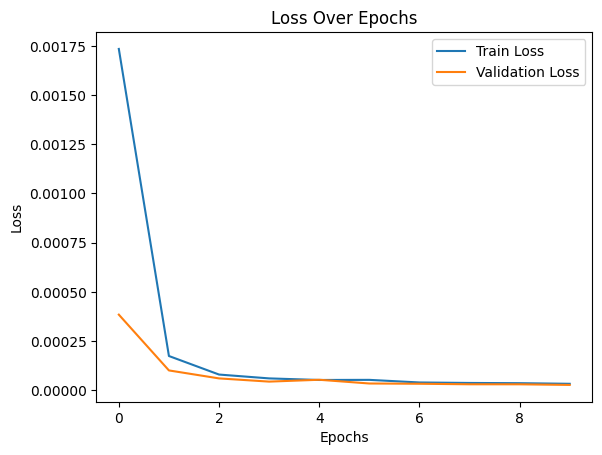

In [30]:
plot_losses(train_losses, val_losses)

In [31]:
# Evaluate on test set
model.eval()
test_predictions, test_targets = [], []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.cpu().numpy())
        test_targets.extend(inputs.cpu().numpy())

# Calculate R^2 score
r2 = r2_score(np.array(test_targets), np.array(test_predictions))
print(f'R^2 Score on Test Data: {r2:.4f}')

R^2 Score on Test Data: 0.8491


In [32]:
# Save the trained model
save_model(model)

In [33]:
def evaluate_reconstruction_error(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            total_loss += loss.item() * inputs.size(0)
    total_loss /= len(data_loader.dataset)
    return total_loss

In [34]:
reconstruction_error = evaluate_reconstruction_error(model, test_loader, criterion, device)
print(f'Reconstruction Error (MSE) on Test Data: {reconstruction_error:.4f}')

Reconstruction Error (MSE) on Test Data: 0.0000


In [35]:
len(X)

1000000

In [36]:
print(X.shape[1])

46


In [37]:
import torch
import torch.nn as nn
import numpy as np

class TemporalAutoencoder(nn.Module):
    def __init__(self, feature_dim, sequence_length, num_features):
        super(TemporalAutoencoder, self).__init__()
        self.sequence_length = sequence_length
        self.num_features = num_features
        self.lstm_hidden_dim = 128  # Hidden dimension for LSTM layer
        self.lstm_layers = 1  # Number of layers in LSTM

        self.lstm_layer = nn.LSTM(
            input_size=num_features,
            hidden_size=self.lstm_hidden_dim,
            num_layers=self.lstm_layers,
            batch_first=True
        )

        self.feature_encoder = self._build_encoder(sequence_length * self.lstm_hidden_dim)
        self.feature_decoder = self._build_decoder(sequence_length * num_features)

    def _build_encoder(self, input_dim):
        return nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)
        )

    def _build_decoder(self, output_dim):
        return nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x, _ = self.lstm_layer(x)
        x = x.reshape(x.size(0), -1)  # Flatten the output
        encoded_features = self.feature_encoder(x)
        decoded_features = self.feature_decoder(encoded_features)
        return decoded_features.view(-1, self.num_features)

In [39]:
input_size = X_train_scaled.shape[1]
model = TemporalAutoencoder(feature_dim=X_train_scaled.shape[1], sequence_length=1, num_features=46).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

# Training and validation
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs)

Epoch 1/10, Train Loss: 0.0033, Val Loss: 0.0005
Epoch 2/10, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 3/10, Train Loss: 0.0002, Val Loss: 0.0002
Epoch 4/10, Train Loss: 0.0001, Val Loss: 0.0002
Epoch 5/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 6/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 7/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 8/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 9/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 10/10, Train Loss: 0.0001, Val Loss: 0.0001


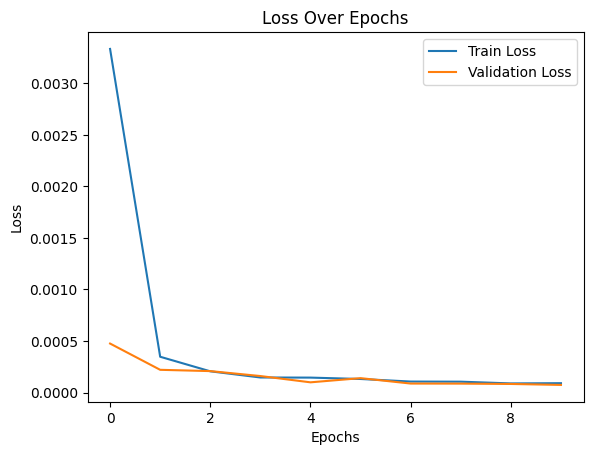

In [40]:
plot_losses(train_losses, val_losses)

In [43]:
# Evaluate on test set
model.eval()
test_predictions, test_targets = [], []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.cpu().numpy())
        test_targets.extend(inputs.cpu().numpy())

# Calculate R^2 score
r2 = r2_score(np.array(test_targets), np.array(test_predictions))
print(f'R^2 Score on Test Data: {r2:.4f}')

R^2 Score on Test Data: 0.8362


In [41]:
reconstruction_error = evaluate_reconstruction_error(model, test_loader, criterion, device)
print(f'Reconstruction Error (MSE) on Test Data: {reconstruction_error:.4f}')

Reconstruction Error (MSE) on Test Data: 0.0001


In [44]:
import torch
import torch.nn as nn
import numpy as np

class CompactDeepAutoencoder(nn.Module):
    def __init__(self, features_dim):
        super(CompactDeepAutoencoder, self).__init__()
        self.encode_layers = nn.Sequential(
            nn.Linear(features_dim, 256), nn.ReLU(True),
            nn.Linear(256, 128), nn.ReLU(True),
            nn.Linear(128, 64), nn.ReLU(True),
            nn.Linear(64, 32), nn.ReLU(True),
            nn.Linear(32, 16), nn.ReLU(True),
            nn.Linear(16, 3)
        )
        self.decode_layers = nn.Sequential(
            nn.Linear(3, 16), nn.ReLU(True),
            nn.Linear(16, 32), nn.ReLU(True),
            nn.Linear(32, 64), nn.ReLU(True),
            nn.Linear(64, 128), nn.ReLU(True),
            nn.Linear(128, 256), nn.ReLU(True),
            nn.Linear(256, features_dim), nn.Sigmoid()
        )

    def forward(self, inputs):
        encoded = self.encode_layers(inputs)
        decoded = self.decode_layers(encoded)
        return decoded

In [47]:
input_size = X_train_scaled.shape[1]
model = CompactDeepAutoencoder(features_dim=X_train_scaled.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

# Training and validation
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs)

Epoch 1/10, Train Loss: 0.0014, Val Loss: 0.0004
Epoch 2/10, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 3/10, Train Loss: 0.0002, Val Loss: 0.0001
Epoch 4/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 5/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 6/10, Train Loss: 0.0001, Val Loss: 0.0002
Epoch 7/10, Train Loss: 0.0001, Val Loss: 0.0002
Epoch 8/10, Train Loss: 0.0002, Val Loss: 0.0002
Epoch 9/10, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 10/10, Train Loss: 0.0001, Val Loss: 0.0001


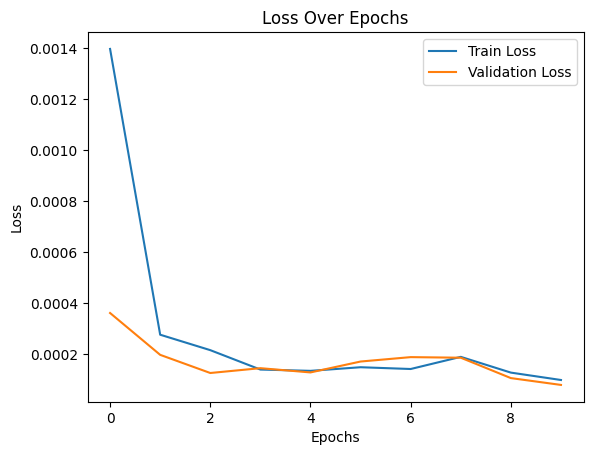

In [48]:
plot_losses(train_losses, val_losses)

In [49]:
# Evaluate on test set
model.eval()
test_predictions, test_targets = [], []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.cpu().numpy())
        test_targets.extend(inputs.cpu().numpy())

# Calculate R^2 score
r2 = r2_score(np.array(test_targets), np.array(test_predictions))
print(f'R^2 Score on Test Data: {r2:.4f}')

R^2 Score on Test Data: 0.8214


In [50]:
reconstruction_error = evaluate_reconstruction_error(model, test_loader, criterion, device)
print(f'Reconstruction Error (MSE) on Test Data: {reconstruction_error:.4f}')

Reconstruction Error (MSE) on Test Data: 0.0001
